In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Importing functions from the above library
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC # Support vector classifier
from sklearn.model_selection import GridSearchCV # To select the best parameters
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# Upload dataset - mushroom.csv
#Reading our dataset
df = pd.read_csv('mushroom.csv')
df

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1995        attached      crowded    narrow  chocolate  ...    partial   
1996        attached      distant    narrow        red  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number   ring_type spore_print_color population  habitat  \
0         brown         two   sheathing         chocolate  clustered    waste   
1         brown         two   sheathing             brown   numerous    waste   
2        yellow         two   sheathing            purple   abundant    waste   
3        yellow         two    cobwebby             green  clustered  grasses   
4         white        none        none            yellow  clustered    urban   
...         ...         ...         ...               ...        ...      ...   
1995     orange         one     flaring            purple   abundant   leaves   
1996      white         one        zone            yellow   numerous    waste   
1997      brown         two  evanescent            yellow   abundant    woods   
1998     yellow         one    cobwebby             brown   solitary    woods   
1999      white         two       large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1995  poisonous     5.877891    17.464145  
1996  poisonous     6.500840    13.501957  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  
1999  poisonous    13.066414    21.056642  

[2000 rows x 26 columns]

# **01. EDA and preprocessing**

In [4]:
#To understand shape of dataset, the no. of null values if present in the dataset and identify the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
# Checking the count of null values we have in the dataset
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [6]:
df.describe()

Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054

In [7]:
# Checking for any duplicates in the dataset
df[df.duplicated()]

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
34          1279      bell      smooth      pink      no     foul   
70          1275    sunken       scaly    yellow      no  pungent   
76           549   conical     grooves     brown      no     foul   
109         1198    sunken      smooth     white      no    anise   
127         1167    sunken       scaly     white      no    anise   
...          ...       ...         ...       ...     ...      ...   
1993         618      flat     grooves     green     yes    musty   
1994         871      flat       scaly      pink      no    spicy   
1995         863    sunken       scaly     brown     yes     foul   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
34           notched      distant     broad       pink  ...  universal   
70        descending      distant    narrow     orange  ...    partial   
76              free      distant     broad      white  ...    partial   
109         attached      crowded     broad      black  ...    partial   
127       descending      distant     broad       pink  ...    partial   
...              ...          ...       ...        ...  ...        ...   
1993         notched      crowded     broad  chocolate  ...  universal   
1994        attached      distant    narrow        red  ...  universal   
1995        attached      crowded    narrow  chocolate  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   

     veil_color ring_number   ring_type spore_print_color population  habitat  \
34        brown         one        zone             black  scattered   leaves   
70        white        none        zone             white   numerous   leaves   
76       yellow         two       large         chocolate   solitary    woods   
109       brown         two   sheathing             black   solitary    woods   
127       brown         two   sheathing         chocolate  clustered    waste   
...         ...         ...         ...               ...        ...      ...   
1993     yellow         one        zone             brown   abundant  meadows   
1994      brown         two        zone             brown   abundant  meadows   
1995     orange         one     flaring            purple   abundant   leaves   
1997      brown         two  evanescent            yellow   abundant    woods   
1998     yellow         one    cobwebby             brown   solitary    woods   

          class stalk_height cap_diameter  
34    poisonous     5.291009     5.436304  
70    poisonous     4.746453    10.769935  
76    poisonous    12.206952     5.061715  
109      edible    13.214007    14.549171  
127   poisonous    14.276173     5.054983  
...         ...          ...          ...  
1993  poisonous    14.834383     2.053744  
1994  poisonous     4.794826     4.576464  
1995  poisonous     5.877891    17.464145  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  

[1024 rows x 26 columns]

In [8]:
# Finding out the total count of the duplicated items
df.duplicated().sum()

1024

In [9]:
# Dropping the duplicated items
df.drop_duplicates(inplace=True)

In [10]:
df

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1985         877   conical     grooves     brown      no     foul   
1988         926      bell     grooves      pink     yes    anise   
1989         289    sunken      smooth    purple     yes    anise   
1996        1160    sunken       scaly    purple     yes    musty   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1985         notched      crowded     broad  chocolate  ...  universal   
1988      descending      distant     broad      brown  ...    partial   
1989      descending      crowded    narrow       buff  ...  universal   
1996        attached      distant    narrow        red  ...    partial   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number  ring_type spore_print_color population  habitat  \
0         brown         two  sheathing         chocolate  clustered    waste   
1         brown         two  sheathing             brown   numerous    waste   
2        yellow         two  sheathing            purple   abundant    waste   
3        yellow         two   cobwebby             green  clustered  grasses   
4         white        none       none            yellow  clustered    urban   
...         ...         ...        ...               ...        ...      ...   
1985      brown        none      large             brown   numerous    paths   
1988      brown         two    pendant            yellow   numerous  grasses   
1989     orange         two       none            orange   abundant  grasses   
1996      white         one       zone            yellow   numerous    waste   
1999      white         two      large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1985     edible    13.020616     9.993008  
1988  poisonous     3.751597    18.868135  
1989     edible    13.134058    15.740028  
1996  poisonous     6.500840    13.501957  
1999  poisonous    13.066414    21.056642  

[976 rows x 26 columns]

In [11]:
df.corr(numeric_only=True)

Unnamed: 0  stalk_height  cap_diameter
Unnamed: 0      1.000000      0.000815      0.042726
stalk_height    0.000815      1.000000     -0.034891
cap_diameter    0.042726     -0.034891      1.000000

In [12]:
# Performing Label Encoding
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [13]:
df

Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0            889          4            2          7        0     1   
1            786          4            0          6        0     1   
2            246          3            1          5        1     4   
3            221          0            2          4        1     3   
4            630          3            3          8        1     5   
...          ...        ...          ...        ...      ...   ...   
1985         667          1            1          0        0     4   
1988         707          0            1          4        1     1   
1989         227          4            3          5        1     1   
1996         885          4            2          5        1     5   
1999         814          2            2          8        1     7   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                   1             2          0           7  ...          0   
1                   3             1          1           3  ...          1   
2                   1             1          0           8  ...          1   
3                   3             0          0           6  ...          0   
4                   2             1          1           6  ...          1   
...               ...           ...        ...         ...  ...        ...   
1985                3             1          0           3  ...          1   
1988                1             2          0           1  ...          0   
1989                1             1          1           2  ...          1   
1996                0             2          1           9  ...          0   
1999                1             0          1           8  ...          0   

      veil_color  ring_number  ring_type  spore_print_color  population  \
0              0            2          6                  3           1   
1              0            2          6                  1           2   
2              3            2          6                  6           0   
3              3            2          0                  4           1   
4              2            0          4                  8           1   
...          ...          ...        ...                ...         ...   
1985           0            0          3                  1           2   
1988           0            2          5                  8           2   
1989           1            2          4                  5           0   
1996           2            1          7                  8           2   
1999           2            2          3                  7           2   

      habitat  class  stalk_height  cap_diameter  
0           5      1           916           190  
1           5      0           128           750  
2           5      1           537           281  
3           0      1           234           829  
4           4      1           895           484  
...       ...    ...           ...           ...  
1985        3      0           819           389  
1988        0      1           112           743  
1989        0      0           830           610  
1996        5      1           335           521  
1999        4      1           825           832  

[976 rows x 26 columns]

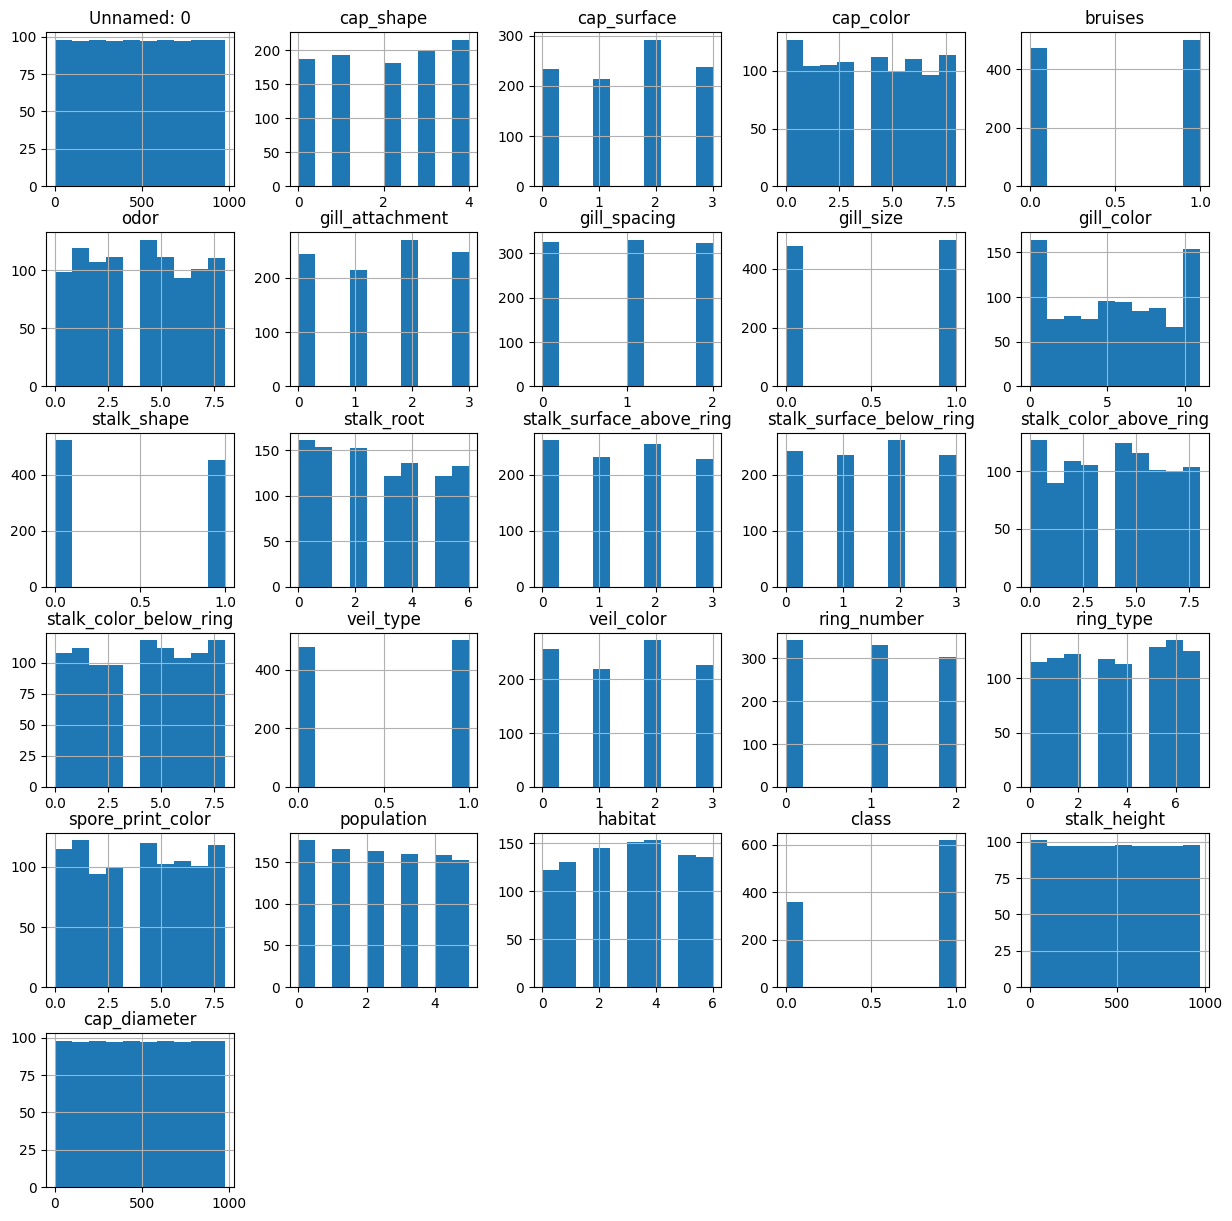

In [14]:
df.hist(figsize=(15,15))
plt.show()

In [15]:
df.corr()

Unnamed: 0  cap_shape  cap_surface  cap_color  \
Unnamed: 0                  1.000000  -0.003994    -0.024853   0.040070   
cap_shape                  -0.003994   1.000000     0.024645   0.020694   
cap_surface                -0.024853   0.024645     1.000000   0.010129   
cap_color                   0.040070   0.020694     0.010129   1.000000   
bruises                    -0.019282  -0.007043    -0.013355   0.007862   
odor                       -0.017484  -0.035072    -0.001229  -0.056524   
gill_attachment            -0.017097   0.017091    -0.008412   0.000201   
gill_spacing                0.042679  -0.026279     0.033273   0.001367   
gill_size                   0.025352   0.017675    -0.046493   0.034965   
gill_color                  0.019288   0.050239     0.033423   0.005884   
stalk_shape                -0.032403  -0.013837    -0.012625  -0.015452   
stalk_root                  0.029289   0.052715    -0.021370   0.006823   
stalk_surface_above_ring   -0.044258  -0.048211     0.034439  -0.038396   
stalk_surface_below_ring   -0.071934   0.006413    -0.011787   0.004605   
stalk_color_above_ring      0.003836  -0.038000    -0.051801  -0.003503   
stalk_color_below_ring     -0.007200  -0.018025    -0.003789  -0.007788   
veil_type                   0.032557  -0.015447    -0.042954  -0.008664   
veil_color                  0.003737  -0.004381     0.027026  -0.027817   
ring_number                -0.068040   0.038398     0.005017   0.037536   
ring_type                   0.000254   0.012335     0.002838   0.023527   
spore_print_color          -0.003676   0.008641    -0.057301   0.045805   
population                  0.009001   0.009890    -0.026943  -0.039548   
habitat                     0.034993  -0.003017    -0.038786  -0.006857   
class                       0.021075   0.008132    -0.047799  -0.048735   
stalk_height                0.001462  -0.020207     0.025817   0.026889   
cap_diameter                0.042838   0.016437     0.030744   0.006585   

                           bruises      odor  gill_attachment  gill_spacing  \
Unnamed: 0               -0.019282 -0.017484        -0.017097      0.042679   
cap_shape                -0.007043 -0.035072         0.017091     -0.026279   
cap_surface              -0.013355 -0.001229        -0.008412      0.033273   
cap_color                 0.007862 -0.056524         0.000201      0.001367   
bruises                   1.000000  0.051111         0.006422     -0.017566   
odor                      0.051111  1.000000        -0.013212     -0.030698   
gill_attachment           0.006422 -0.013212         1.000000     -0.024634   
gill_spacing             -0.017566 -0.030698        -0.024634      1.000000   
gill_size                -0.004689 -0.057671        -0.011606      0.012648   
gill_color               -0.033166 -0.030782         0.026293     -0.004135   
stalk_shape               0.035013 -0.003433        -0.021527      0.060430   
stalk_root               -0.000106 -0.001555        -0.018382     -0.003949   
stalk_surface_above_ring -0.041081  0.048396        -0.000495     -0.019223   
stalk_surface_below_ring -0.002800 -0.025388        -0.011155     -0.038614   
stalk_color_above_ring    0.013911  0.003075        -0.015330     -0.001535   
stalk_color_below_ring   -0.088043  0.014668         0.026026     -0.002366   
veil_type                 0.007497  0.022875        -0.044643     -0.027653   
veil_color               -0.023444  0.033718        -0.005227     -0.003433   
ring_number              -0.037722 -0.031397         0.048239      0.009182   
ring_type                -0.067596  0.005064        -0.049124      0.008323   
spore_print_color        -0.028591 -0.078276        -0.020564      0.023472   
population                0.014990 -0.000816         0.003722      0.005042   
habitat                   0.011681 -0.021675        -0.020783      0.024691   
class                    -0.007932  0.009625        -0.023758      0.045121   
stalk_height             

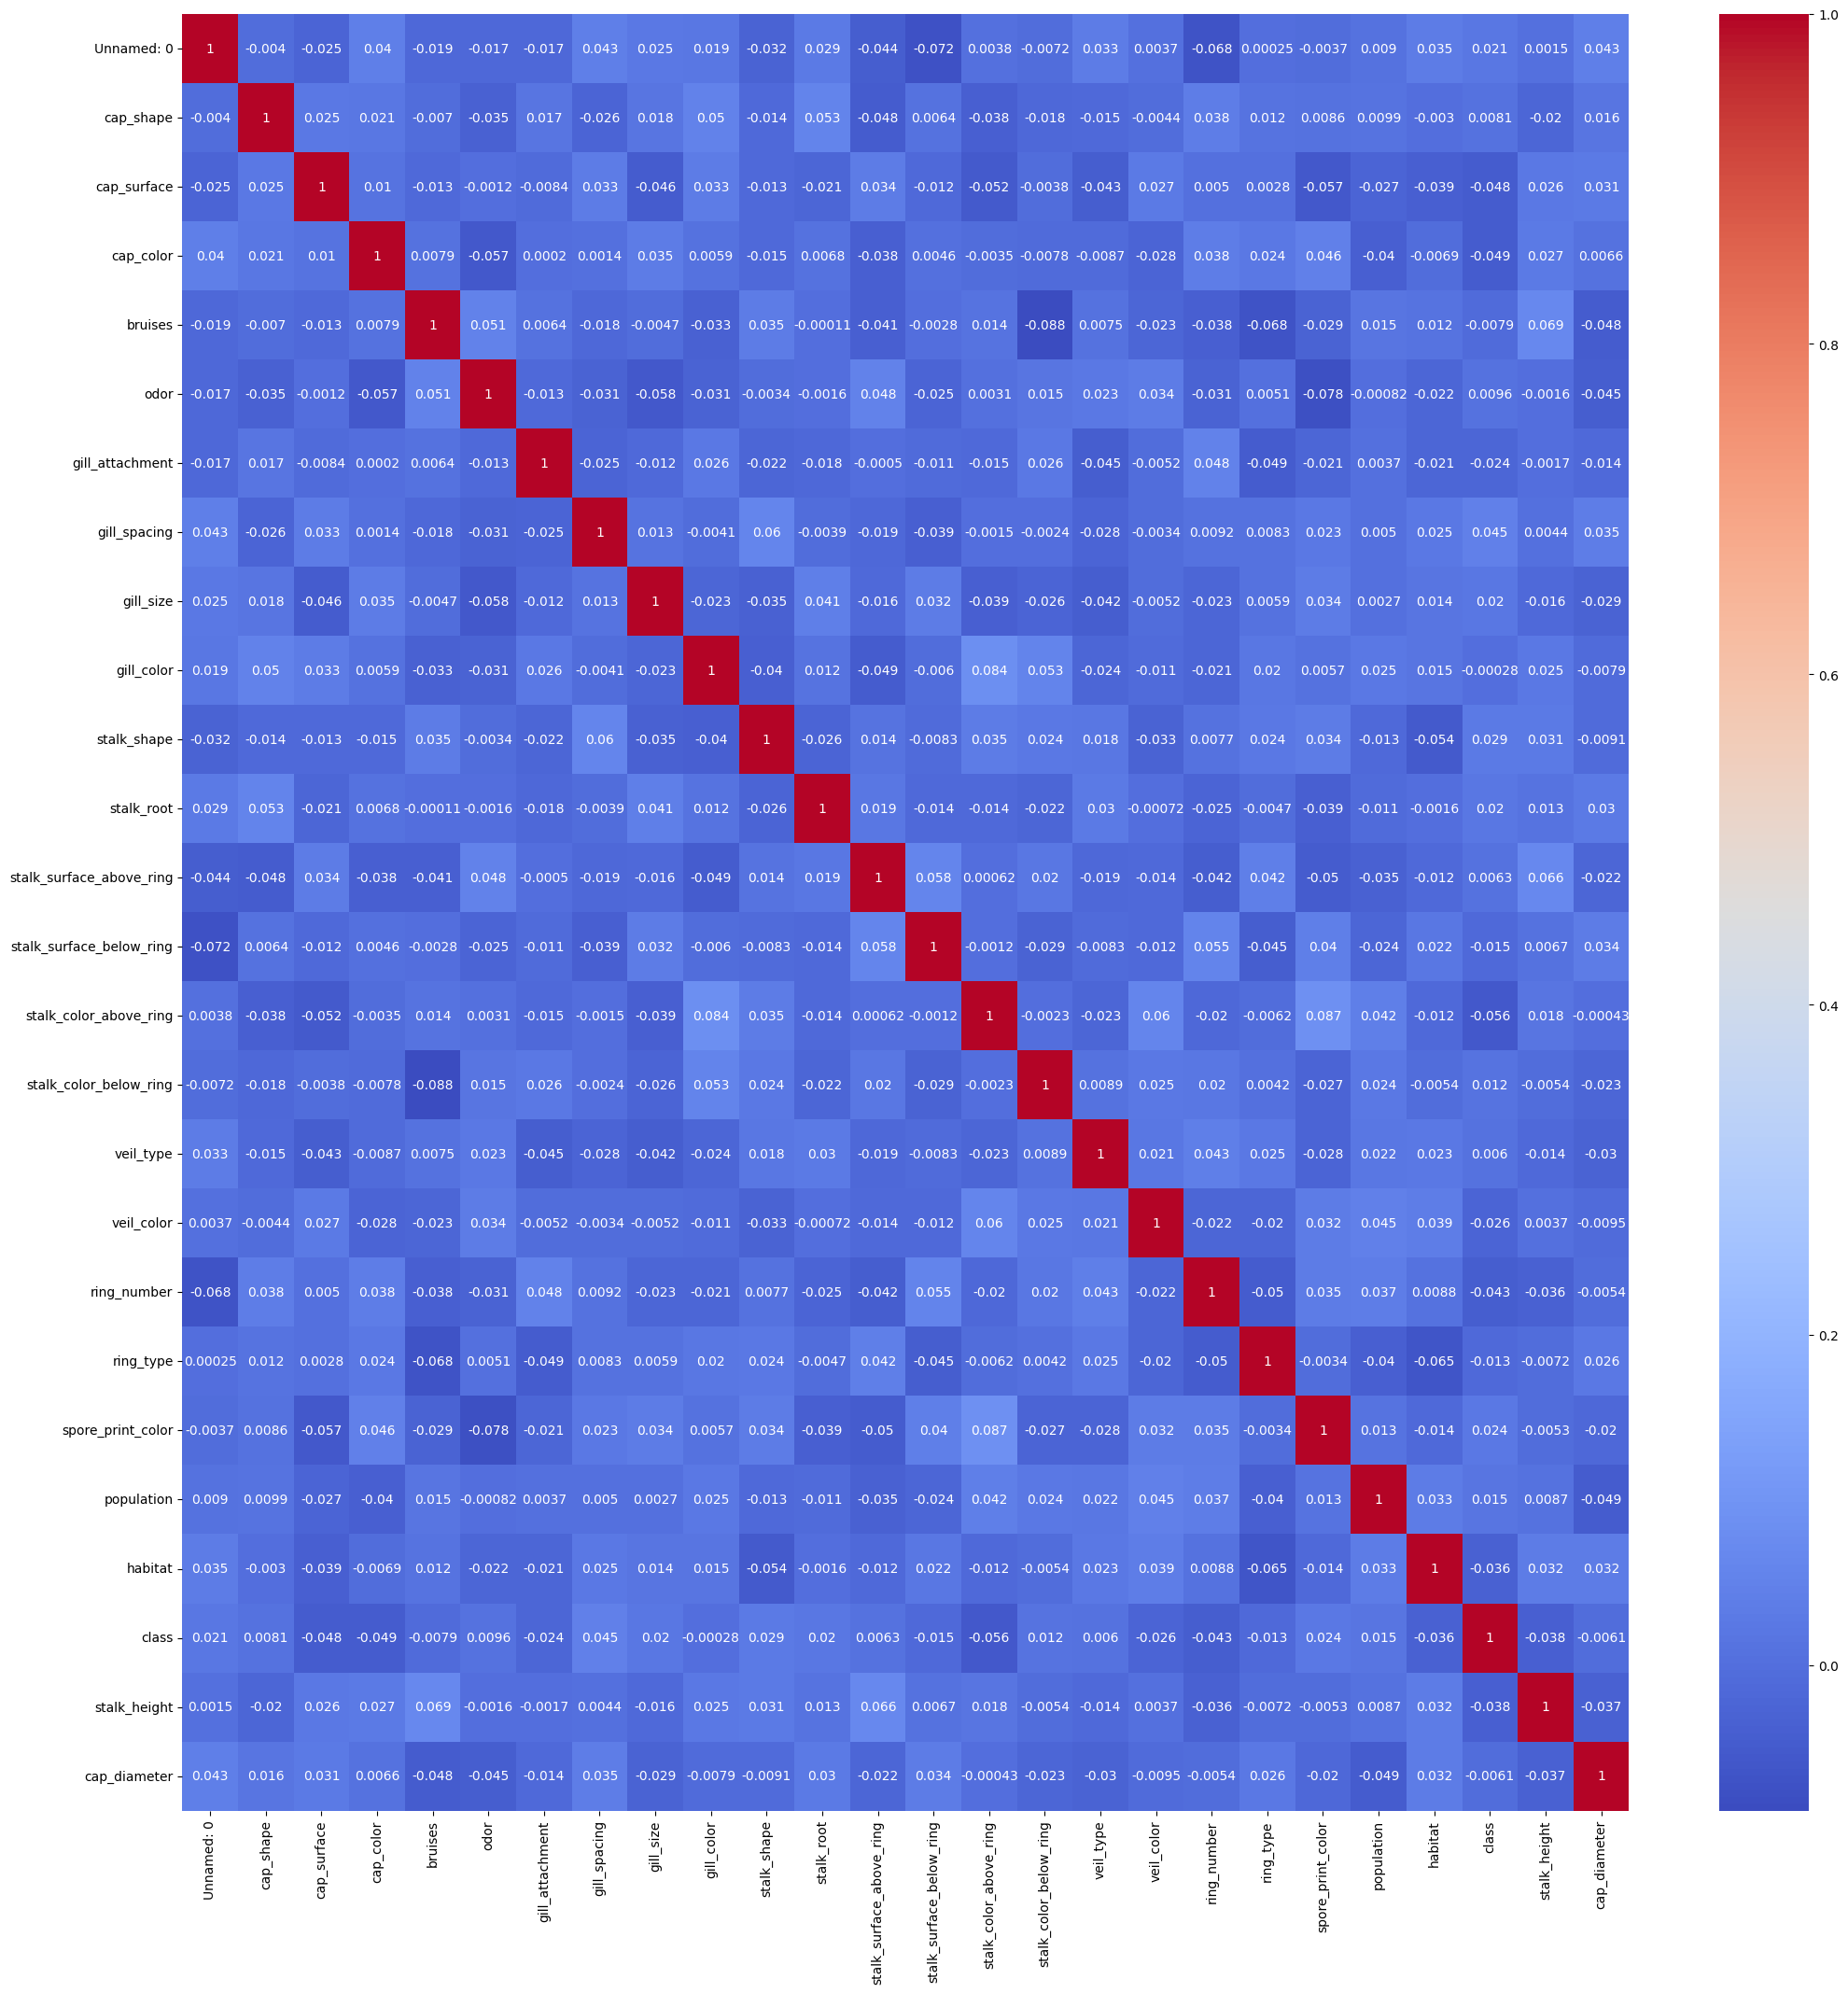

In [16]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True, cmap = 'coolwarm')
plt.show()

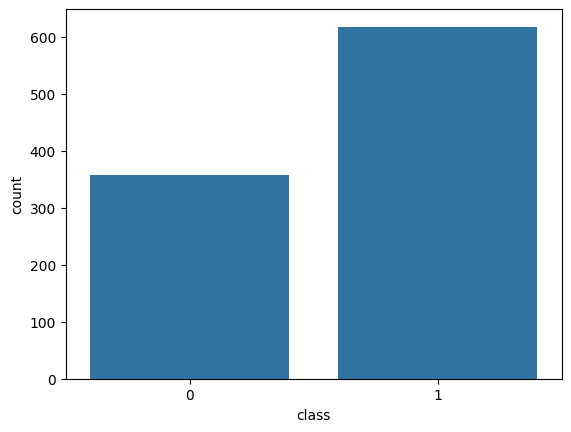

In [17]:
sns.countplot(x='class', data=df)
plt.show()

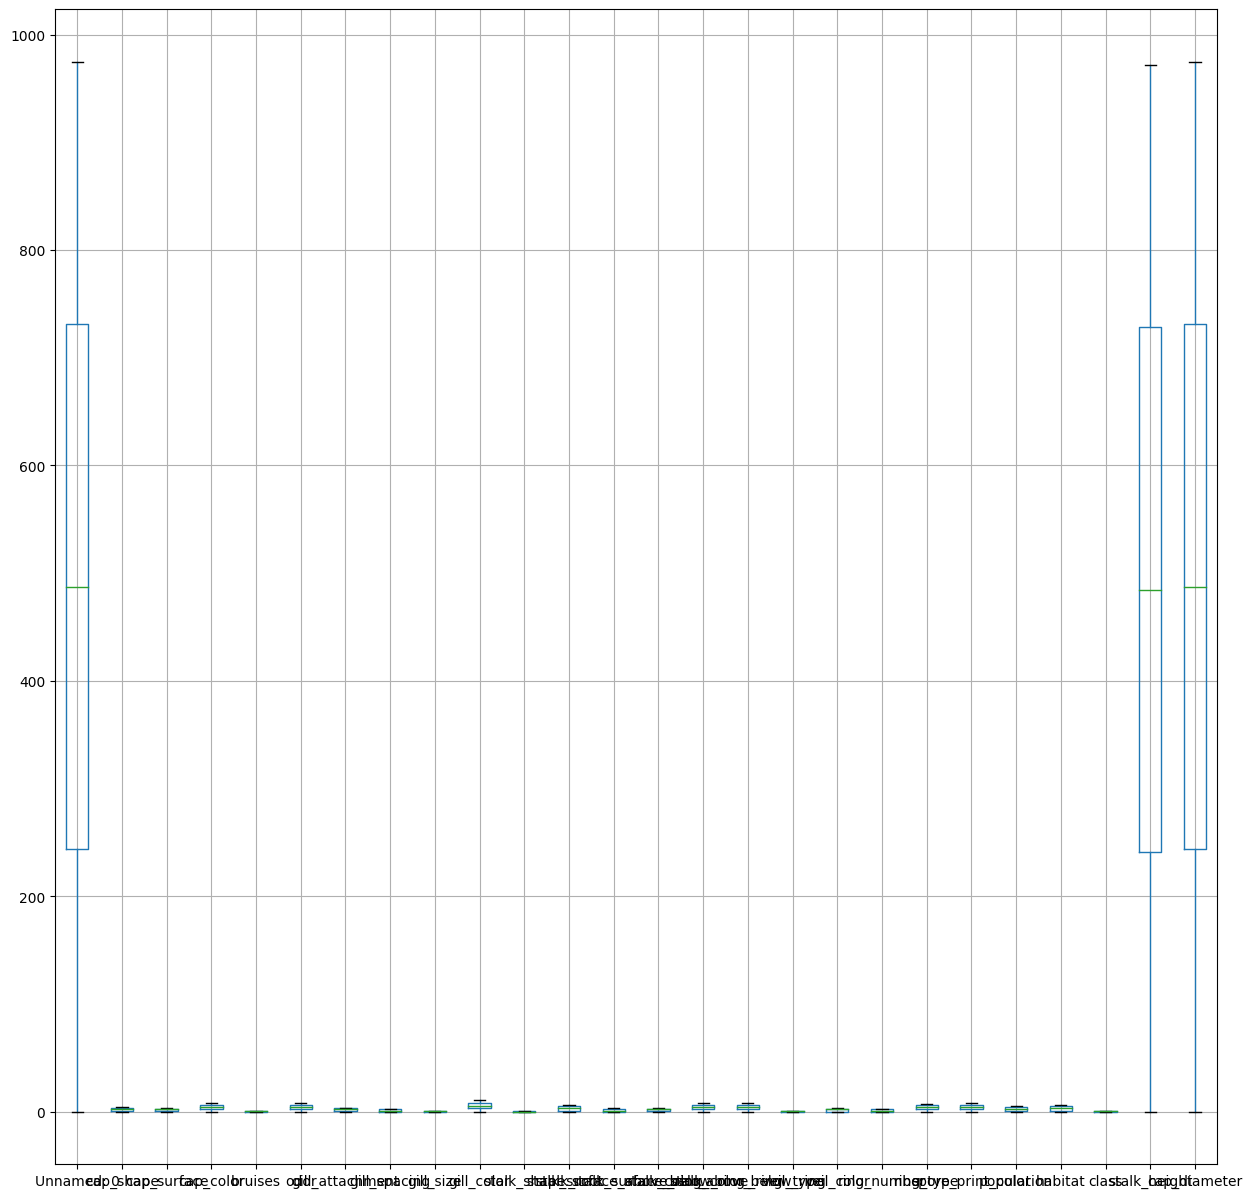

In [18]:
df.boxplot(figsize=(15,15))
plt.show()

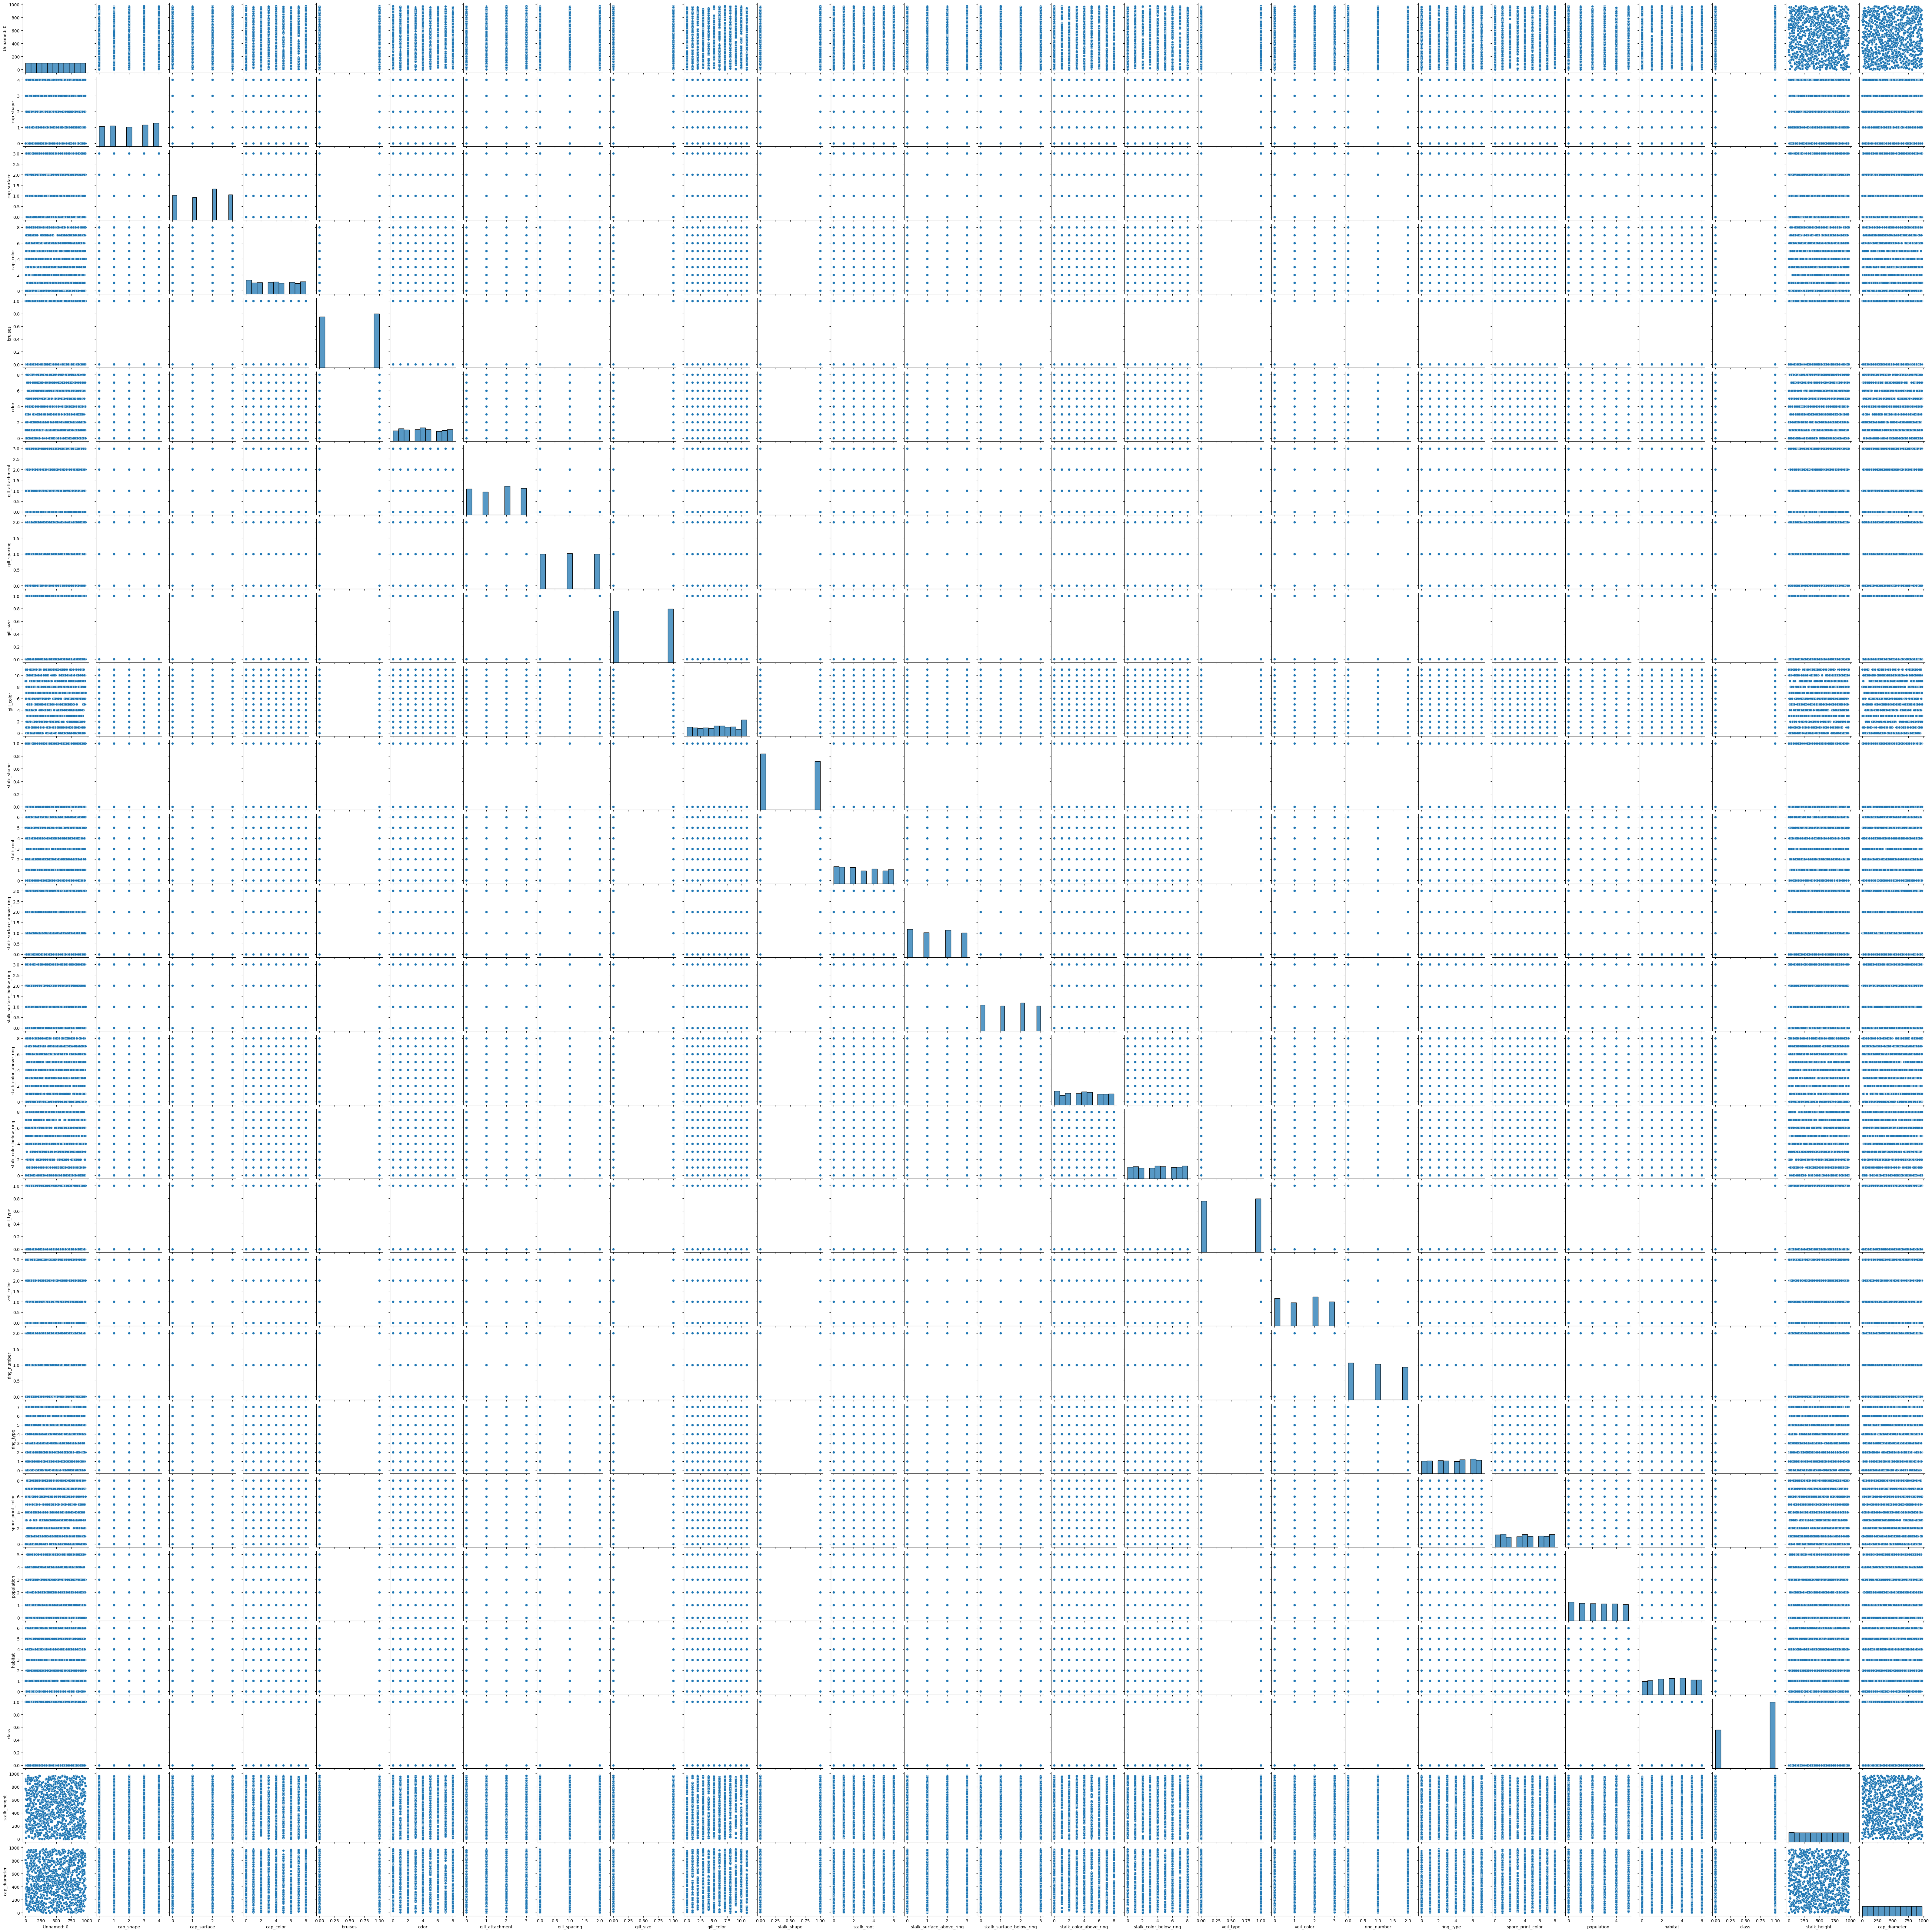

In [19]:
sns.pairplot(df)
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Unnamed: 0                976 non-null    int64
 1   cap_shape                 976 non-null    int64
 2   cap_surface               976 non-null    int64
 3   cap_color                 976 non-null    int64
 4   bruises                   976 non-null    int64
 5   odor                      976 non-null    int64
 6   gill_attachment           976 non-null    int64
 7   gill_spacing              976 non-null    int64
 8   gill_size                 976 non-null    int64
 9   gill_color                976 non-null    int64
 10  stalk_shape               976 non-null    int64
 11  stalk_root                976 non-null    int64
 12  stalk_surface_above_ring  976 non-null    int64
 13  stalk_surface_below_ring  976 non-null    int64
 14  stalk_color_above_ring    976 non-null    int6

# **02. Splitting the data and implementing the model**

In [21]:
# Divide into target and independant variables
x=df.drop(['class'],axis=1)
y=df['class']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

Grid Search CV

In [23]:
# Using Grid Search CV identifying the best parameters for kernel, gamma and cost values
# giving a list of kernel values, gamma values and a list of cost values
model = SVC() # The model
# We are then using RBF - radial basis function kernel, giving a list of gamma values and a list of cost values
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
# from the above values/parameter we are using grid search CV and identifying the best parameters
gscv = GridSearchCV(model,param_grid,cv=10)
# Fitting it on the training dataset
gscv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [24]:
# Finding out the best parameters
gscv.best_params_ , gscv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.6333333333333334)

In [25]:
# Using the best gamma value and cost value, we build the model
model_rbf = SVC(C= 15, gamma = 50)
# Fitting it on training dataset
model_rbf.fit(x_train , y_train)
# Predicting on the testing dataset
y_pred_rbf = model_rbf.predict(x_test)
# Finding out the accuracy
acc_rbf = accuracy_score(y_test, y_pred_rbf) * 100
print("Accuracy of RBF model =", acc_rbf)
confusion_matrix(y_test, y_pred_rbf)

Accuracy of RBF model = 63.26530612244898


array([[  0,  72],
       [  0, 124]])

In [26]:
# Changing the kernel to Linear
model_lin = SVC(kernel= "linear")
model_lin.fit(x_train , y_train)
y_pred_lin = model_lin.predict(x_test)
acc_lin = accuracy_score(y_test, y_pred_lin) * 100
print("Accuracy of Linear model =", acc_lin)
confusion_matrix(y_test, y_pred_lin)

Accuracy of Linear model = 63.26530612244898


array([[  0,  72],
       [  0, 124]])

In [27]:
# Changing the kernel to Poly
model_poly = SVC(kernel= "poly")
model_poly.fit(x_train , y_train)
y_pred_poly = model_poly.predict(x_test)
acc_poly = accuracy_score(y_test, y_pred_poly) * 100
print("Accuracy of Poly model =", acc_poly)
confusion_matrix(y_test, y_pred_poly)

Accuracy of Poly model = 63.26530612244898


array([[  0,  72],
       [  0, 124]])

In [29]:
# Chaning the kernel to sigmoid
model_s = SVC(kernel= "sigmoid")
model_s.fit(x_train , y_train)
y_pred_s = model_s.predict(x_test)
acc_s = accuracy_score(y_test, y_pred_s) * 100
print("Accuracy of Sigmoid model =", acc_s)
confusion_matrix(y_test, y_pred_s)

Accuracy of Sigmoid model = 60.71428571428571


array([[30, 42],
       [35, 89]])

In [30]:
# Printing the classification report for all the 4 models
print('Classification report of RBF model :','\n',classification_report(y_test,y_pred_rbf))
print('\n','Classification report of Linear model :','\n',classification_report(y_test,y_pred_lin))
print('\n','Classification report of Poly model :','\n',classification_report(y_test,y_pred_poly))
print('\n','Classification report of Sigmoid model :','\n',classification_report(y_test,y_pred_s))

Classification report of RBF model : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196


 Classification report of Linear model : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196


 Classification report of Poly model : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   

# **03. Visualizing the SVM Model**

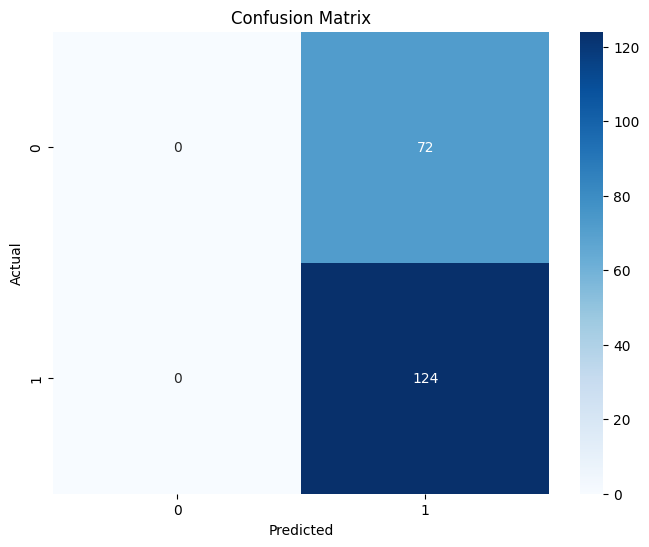

In [31]:
# Visualizing the Poly model of SVM
conf_matrix = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Q2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

A. Strengths of SVM for the Mushroom Dataset:

1. Effective for High-Dimensional Data:

The Mushroom dataset is entirely categorical, and after encoding, each feature contributes to a relatively high-dimensional feature space. SVM is known for its effectiveness in handling high-dimensional spaces, where it can find optimal separating hyperplanes, even when the number of dimensions is large relative to the number of samples.

2. Handling Non-linear Relationships:

SVM can utilize different kernels (like polynomial and radial basis function (RBF)) to capture non-linear relationships between features. Given that the Mushroom dataset may have complex interactions between categorical features, SVM’s ability to apply non-linear kernels is a significant strength. This allows the model to effectively separate classes that might not be linearly separable.

3. Robustness to Outliers:

SVM is robust to outliers because it focuses on maximizing the margin between the classes. Even if the Mushroom dataset contains mislabeled or noisy instances, SVM's margin-based optimization helps mitigate the impact of these outliers on the decision boundary.

4. Good Generalization Performance:

SVM tends to have good generalization ability, particularly when hyperparameters like the regularization parameter (C) are well-tuned. This means that the SVM model, once properly tuned, can perform well on unseen data, making it a reliable choice for classification tasks like this one.

B. Weaknesses of SVM for the Mushroom Dataset:

1. Computational Complexity:

Training SVM can be computationally expensive, especially with non-linear kernels (e.g., RBF) and larger datasets. Although the Mushroom dataset is relatively modest in size, the high dimensionality after encoding can still make SVM training slower compared to some other algorithms.

2. Sensitivity to Feature Scaling:

SVMs are sensitive to the scaling of features. Although this dataset is entirely categorical and encoded, ensuring that all features are appropriately scaled is critical for optimal SVM performance. Any imbalance in the scaling can lead to suboptimal margins and misclassification.

3. Difficulty in Tuning Hyperparameters:

SVM requires careful tuning of hyperparameters like the kernel type, regularization parameter (C), and gamma for RBF kernels. Selecting inappropriate values can lead to underfitting or overfitting. Given the categorical nature and potentially complex feature interactions in the Mushroom dataset, tuning can be particularly challenging and time-consuming.

4. Imbalance Sensitivity:

If the dataset is imbalanced, SVM might not perform as well without additional techniques (e.g., using a weighted SVM). However, since the Mushroom dataset is relatively balanced between edible and poisonous classes, this may not be a significant issue here. Nevertheless, it's something to consider in case there’s any imbalance in similar datasets.

Q3.	Discuss practical implications of SVM in real-world classification tasks.

A. Practical Implications:

1. SVM’s Effectiveness in Real-World Applications: Given the categorical nature of the Mushroom dataset and the effectiveness of SVM in handling high-dimensional spaces, SVM can be a powerful tool in scenarios where complex relationships need to be captured, especially in tasks like image recognition, text classification, and bioinformatics, where features often have non-linear relationships.

2. Considerations for Deployment: In real-world applications, the computational cost of SVM should be considered, especially if the dataset is large or if the model needs to be retrained frequently. Additionally, the time required for hyperparameter tuning should be factored into the deployment timeline.

3. Importance of Proper Preprocessing: The effectiveness of SVM is highly dependent on preprocessing steps like feature scaling and encoding. Careful attention to these steps is necessary to ensure that the SVM model performs optimally.